In [11]:
## VERTICAL MERGING OF TWO IMAGES USING THIS SCRIPT

from PIL import Image
import os

def merge_images_vertically(image_path1, image_path2, output_path):
    """
    Merges two images vertically.

    Args:
        image_path1 (str): Path to the first image.
        image_path2 (str): Path to the second image.
        output_path (str): Path to save the merged image.
    """
    try:
        img1 = Image.open(image_path1).convert("RGBA")
        img2 = Image.open(image_path2).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: One or both image files not found.")
        print(f"Attempted paths: {image_path1}, {image_path2}")
        return
    except Exception as e:
        print(f"Error opening images: {e}")
        return

    # Ensure both images have the same width. If not, resize the smaller one.
    if img1.width != img2.width:
        print("Warning: Image widths are different. Resizing to match the wider image.")
        max_width = max(img1.width, img2.width)
        img1 = img1.resize((max_width, int(img1.height * (max_width / img1.width))))
        img2 = img2.resize((max_width, int(img2.height * (max_width / img2.width))))

    # Create a new image with the combined height and maximum width
    total_height = img1.height + img2.height
    merged_image = Image.new('RGBA', (img1.width, total_height))

    # Paste the images onto the new image
    merged_image.paste(img1, (0, 0))
    merged_image.paste(img2, (0, img1.height))

    # Save the merged image
    try:
        merged_image.save(output_path)
        print(f"Images merged successfully and saved to {output_path}")
    except Exception as e:
        print(f"Error saving merged image: {e}")

if __name__ == "__main__":
    # Example Usage:
    # Create some dummy image files for demonstration
    # (You can replace these with your actual image paths)

    # Create a dummy image 1
    try:
        dummy_img1 = Image.new('RGB', (400, 300), color = 'red')
        dummy_img1.save("image1.png")
        print("Created dummy image1.png")
    except Exception as e:
        print(f"Error creating dummy image1: {e}")

    # Create a dummy image 2 (slightly different width for demonstration)
    try:
        dummy_img2 = Image.new('RGB', (350, 400), color = 'blue')
        dummy_img2.save("image2.png")
        print("Created dummy image2.png")
    except Exception as e:
        print(f"Error creating dummy image2: {e}")

    # Define your image paths
    # image1_path = "D:\\INCOIS\\Research\\radio_sonde\\schematic_1.png"
    # image2_path = "D:\\INCOIS\\Research\\radio_sonde\\schematic_2.png"
    # output_merged_path = "D:\\INCOIS\\Research\\radio_sonde\\merged_image_vertical.png"

    # image1_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_location.png"
    # image2_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_time_1.png"
    # output_merged_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\rs_merge.png"

    image1_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_locations.png"
    image2_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_time_2.png"
    output_merged_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\merge_product.png"

    # Call the function to merge images

    merge_images_vertically(image1_path, image2_path, output_merged_path)

    # Clean up dummy images (optional)
    # if os.path.exists("image1.png"):
    #     os.remove("image1.png")
    # if os.path.exists("image2.png"):
    #     os.remove("image2.png")

Created dummy image1.png
Created dummy image2.png
Images merged successfully and saved to D:\Projects\my_projects\work\radio_sonde\merge_product.png


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def merge_images_grid_with_annotations(
    image_paths, # A list of 4 image paths
    annotations=['a', 'b', 'c', 'd'],
    output_path=None
):
    """
    Displays four images in a 2x2 grid using Matplotlib, with annotations
    at the bottom center of each image.

    Args:
        image_paths (list): A list containing paths to the four images
                            in order: top-left, top-right, bottom-left, bottom-right.
        annotations (list): A list of four strings for annotations (default: ['a', 'b', 'c', 'd']).
        output_path (str, optional): Path to save the merged figure.
                                     If None, the figure is just displayed.
    """
    if len(image_paths) != 4:
        print("Error: Please provide exactly four image paths.")
        return
    if len(annotations) != 4:
        print("Error: Please provide exactly four annotations.")
        return

    images = []
    max_width = 0
    max_height = 0

    # Load images and find max dimensions
    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("RGBA")
            images.append(img)
            if img.width > max_width:
                max_width = img.width
            if img.height > max_height:
                max_height = img.height
        except FileNotFoundError:
            print(f"Error: Image file not found: {path}")
            return
        except Exception as e:
            print(f"Error opening image {path}: {e}")
            return

    # Resize all images to the largest width and height to ensure consistent cell size
    # This maintains aspect ratio, padding with transparent pixels if necessary.
    processed_images_np = []
    for img in images:
        # Create a new blank image with max_width and max_height
        resized_img = Image.new("RGBA", (max_width, max_height), (0, 0, 0, 0)) # Transparent background
        # Calculate paste position to center the image
        x_offset = (max_width - img.width) // 2
        y_offset = (max_height - img.height) // 2
        resized_img.paste(img, (x_offset, y_offset))
        processed_images_np.append(np.asarray(resized_img))

    # Create a figure with a 2x2 grid of subplots
    # Adjust figsize based on the max dimensions of your images
    # A multiplier (e.g., / 100) helps convert pixels to inches for figsize
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(max_width * 2 / 100, max_height * 2 / 100)) # 2x2 grid dimensions

    # Flatten the axs array for easy iteration over subplots
    axs = axs.flatten()

    # Iterate through images and subplots, displaying each image and adding annotation
    for i in range(4):
        ax = axs[i]
        ax.imshow(processed_images_np[i])
        ax.axis('off')  # Hide axes for cleaner image display

        # Add annotation at the bottom center of the image
        # The coordinates (0.5, 0) are relative to the axes:
        # 0.5 is horizontal center, 0 is bottom edge.
        # `transform=ax.transAxes` ensures coordinates are relative to the subplot's axes.
        # `va='top'` aligns the top of the text with the specified y-coordinate (0),
        # effectively placing it just below the image.
        ax.text(0.5, 0, annotations[i],
                color='black', fontsize=16, ha='center', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'),
                transform=ax.transAxes)

    # Adjust layout to prevent titles/images from overlapping
    plt.tight_layout()

    # Save the figure if an output path is provided
    if output_path:
        try:
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0.05) # Add a small pad to bbox_inches
            print(f"Merged grid figure saved to {output_path}")
        except Exception as e:
            print(f"Error saving merged figure: {e}")
    else:
        plt.show() # Display the figure if not saving

if __name__ == "__main__":
    # Create some dummy image files for demonstration
    try:
        Image.new('RGB', (300, 250), color='red').save("image_tl.png")
        Image.new('RGB', (320, 270), color='green').save("image_tr.png")
        Image.new('RGB', (280, 230), color='blue').save("image_bl.png")
        Image.new('RGB', (350, 290), color='yellow').save("image_br.png")
        print("Created dummy images for grid.")
    except Exception as e:
        print(f"Error creating dummy images: {e}")

    # Define your image paths in order: top-left, top-right, bottom-left, bottom-right
    image_paths_for_grid = [
        "D:\\INCOIS\\BORI\\image_inputs\\1.png", # Top-left
        "D:\\INCOIS\\BORI\\image_inputs\\2.png", # Top-right
        "D:\\INCOIS\\BORI\\image_inputs\\5.png", # Bottom-left
        "D:\\INCOIS\\BORI\\image_inputs\\ship_survey.jpg"  # Bottom-right
    ]

    # Define your annotations
    grid_annotations = ['(a)', '(b)', '(c)', '(d)'] # Using parentheses for common scientific notation

    output_grid_path = "D:\\INCOIS\\BORI\\image_inputs\\merged_grid_with_annotations.png"

    # Display the merged images (figure)
    print("\nDisplaying the grid without saving...")
    merge_images_grid_with_annotations(image_paths_for_grid, grid_annotations)

    # Optionally save the merged figure
    print("\nSaving the grid...")
    merge_images_grid_with_annotations(image_paths_for_grid, grid_annotations, output_grid_path)

    # Clean up dummy images (optional)
    # for img_file in ["image_tl.png", "image_tr.png", "image_bl.png", "image_br.png"]:
    #     if os.path.exists(img_file):
    #         os.remove(img_file)

Created dummy images for grid.

Displaying the grid with uniform resize to (300, 240) without saving...


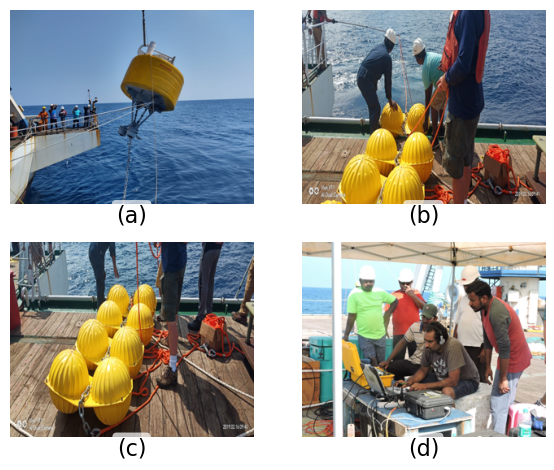


Saving the grid with uniform resize to (300, 240)...
Merged grid figure saved to D:\INCOIS\BORI\image_inputs\merged_grid_uniform_resize_with_annotations.png


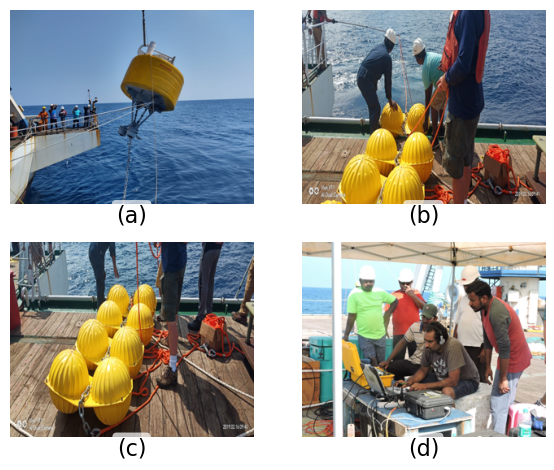

In [ ]:
## GRID MERGING OF FOUR IMAGES USING THIS SCRIPT INTO A 2 X 2 GRID OF IMAGES WITH ANNOTATIONS.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def merge_images_grid_with_annotations_uniform_resize(
    image_paths, # A list of 4 image paths
    uniform_size=(300, 300), # New: Define the uniform size (width, height)
    annotations=['a', 'b', 'c', 'd'],
    output_path=None
):
    """
    Displays four images in a 2x2 grid using Matplotlib, with annotations
    at the bottom center of each image. All input images are resized to
    a specified uniform size.

    Args:
        image_paths (list): A list containing paths to the four images
                            in order: top-left, top-right, bottom-left, bottom-right.
        uniform_size (tuple): A tuple (width, height) specifying the target size
                              for all images. Aspect ratio will be ignored if sizes differ.
        annotations (list): A list of four strings for annotations (default: ['a', 'b', 'c', 'd']).
        output_path (str, optional): Path to save the merged figure.
                                     If None, the figure is just displayed.
    """
    if len(image_paths) != 4:
        print("Error: Please provide exactly four image paths.")
        return
    if len(annotations) != 4:
        print("Error: Please provide exactly four annotations.")
        return

    processed_images_np = []

    # Process each image: open, resize, and convert to NumPy array
    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("RGBA")
            # Resize the image to the uniform_size.
            # This will change the aspect ratio if the original size is different.
            resized_img = img.resize(uniform_size)
            processed_images_np.append(np.asarray(resized_img))
        except FileNotFoundError:
            print(f"Error: Image file not found: {path}")
            return
        except Exception as e:
            print(f"Error opening or resizing image {path}: {e}")
            return

    # Extract width and height from the uniform_size for figsize calculation
    uniform_width, uniform_height = uniform_size

    # Create a figure with a 2x2 grid of subplots
    # figsize calculated based on the uniform_size for each image
    fig, axs = plt.subplots(
        nrows=2, ncols=2,
        figsize=(uniform_width * 2 / 100, uniform_height * 2 / 100) # 2x2 grid dimensions
    )

    # Flatten the axs array for easy iteration over subplots
    axs = axs.flatten()

    # Iterate through images and subplots, displaying each image and adding annotation
    for i in range(4):
        ax = axs[i]
        ax.imshow(processed_images_np[i])
        ax.axis('off')  # Hide axes for cleaner image display

        # Add annotation at the bottom center of the image
        ax.text(0.5, 0, annotations[i],
                color='black', fontsize=16, ha='center', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'),
                transform=ax.transAxes)  # text size (0.5 to 0.2), fontsize = (16 to 12), 

    # Adjust layout to prevent titles/images from overlapping
    plt.tight_layout()

    # Save the figure if an output path is provided
    if output_path:
        try:
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0.05) #changed from 0.05 to 0.02
            print(f"Merged grid figure saved to {output_path}")
        except Exception as e:
            print(f"Error saving merged figure: {e}")
    else:
        plt.show() # Display the figure if not saving

if __name__ == "__main__":
    # Create some dummy image files for demonstration
    # Notice the dummy images still have different original sizes
    try:
        Image.new('RGB', (300, 250), color='red').save("image_tl_orig.png")
        Image.new('RGB', (320, 270), color='green').save("image_tr_orig.png")
        Image.new('RGB', (280, 230), color='blue').save("image_bl_orig.png")
        Image.new('RGB', (350, 290), color='yellow').save("image_br_orig.png")
        print("Created dummy images for grid.")
    except Exception as e:
        print(f"Error creating dummy images: {e}")

    Define your image paths
    image_paths_for_grid = [
        "D:\\INCOIS\\BORI\\image_inputs\\buoy.jpeg", # Top-left
        "D:\\INCOIS\\BORI\\image_inputs\\floats1.jpeg", # Top-right
        "D:\\INCOIS\\BORI\\image_inputs\\floats3.jpeg", # Bottom-left
        "D:\\INCOIS\\BORI\\image_inputs\\ranging.jpeg"  # Bottom-right
    ]


    # Define the desired uniform size for ALL images
    # All images will be resized to 200x200 pixels
    desired_uniform_size = (300, 240)

    # Define your annotations
    grid_annotations = ['(a)', '(b)', '(c)', '(d)']

    output_grid_path_uniform = "D:\\INCOIS\\BORI\\image_inputs\\merged_grid_uniform_resize_with_annotations.png"
    
    # Display the merged images (figure)
    print(f"\nDisplaying the grid with uniform resize to {desired_uniform_size} without saving...")
    merge_images_grid_with_annotations_uniform_resize(
        image_paths_for_grid,
        uniform_size=desired_uniform_size,
        annotations=grid_annotations
    )

    # Optionally save the merged figure
    print(f"\nSaving the grid with uniform resize to {desired_uniform_size}...")
    merge_images_grid_with_annotations_uniform_resize(
        image_paths_for_grid,
        uniform_size=desired_uniform_size,
        annotations=grid_annotations,
        output_path=output_grid_path_uniform
    )

    # Clean up dummy images (optional)
    # for img_file in ["image_tl_orig.png", "image_tr_orig.png", "image_bl_orig.png", "image_br_orig.png"]:
    #     if os.path.exists(img_file):
    #         os.remove(img_file)